In [1]:
from ShapleyVIC import df_compas

compas = df_compas.load_data()
# See data description using the following command:
# help(df_compas.load_data)
compas.loc[:5]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


,y,age,race,prior,gender,juvenilecrime,currentcharge,train_test
0,0,0,0,1,1,1,0,train
1,1,0,1,1,1,1,0,train
2,1,0,1,0,1,0,0,train
3,0,0,1,0,1,0,0,train
4,0,0,0,0,1,1,0,train
5,0,0,0,1,1,1,1,train


In [2]:
dat_train = compas.loc[compas['train_test']=='train']
# Drop the indicator column after using it to split data:
dat_train = dat_train.drop(columns=['train_test'])
dat_train.reset_index(drop=True, inplace=True)

dat_expl = compas.loc[compas['train_test']=='test']
dat_expl = dat_expl.drop(columns=['train_test'])
dat_expl.reset_index(drop=True, inplace=True)

In [3]:
y_name = 'y'
from ShapleyVIC import model
model_object = model.models(
    x=dat_train.drop(columns=[y_name]), y=dat_train[y_name], 
    outcome_type="binary", 
    x_names_cat=['age','race','prior','gender','juvenilecrime','currentcharge'],
    output_dir="compas_output"
)
# To display the optimal logistic regression trained:
model_object.model_optim.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,0.4455,0.107,4.160,0.000,0.236,0.655
age_1,1.5001,0.187,8.011,0.000,1.133,1.867
race_1,0.4164,0.053,7.858,0.000,0.313,0.520
prior_1,-0.8543,0.061,-13.984,0.000,-0.974,-0.735
gender_1,0.3835,0.068,5.651,0.000,0.251,0.517
juvenilecrime_1,-0.8646,0.084,-10.238,0.000,-1.030,-0.699
currentcharge_1,-0.2544,0.056,-4.562,0.000,-0.364,-0.145


In [4]:
u1, u2 = model_object.init_hyper_params(m=200)
(u1, u2)

Nearly optimal defined based on loss with epsilon=0.05.



(0.5, 80.3125)

Nearly optimal defined based on loss with epsilon=0.05.



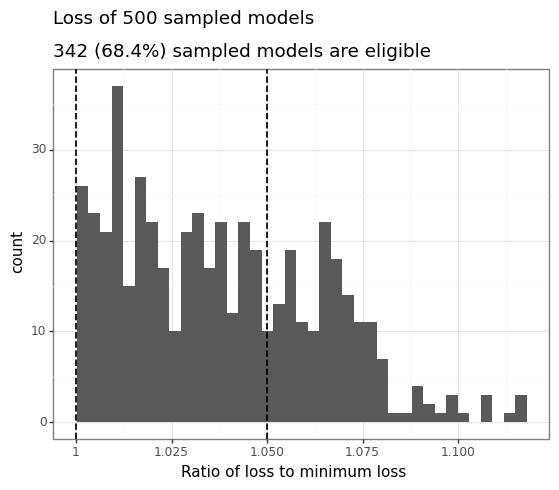

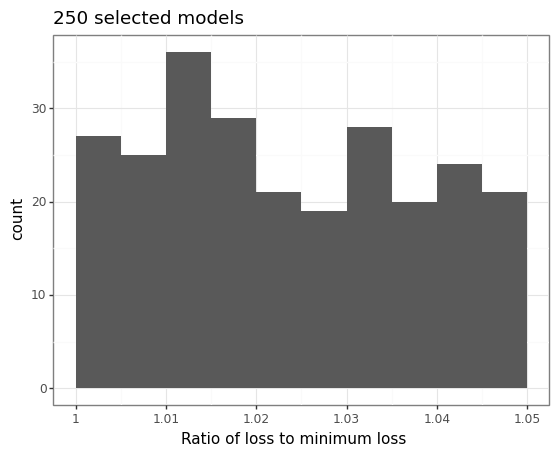

(<ggplot: (380908079)>, <ggplot: (380930613)>)

In [5]:
model_object.draw_models(u1=u1, u2=u2, m=500, n_final=250, random_state=1234)
model_object.models_plot

In [6]:
from ShapleyVIC import compute
m_svic = compute.compute_shapley_vic(
    model_obj=model_object, 
    x_expl=dat_expl.drop(columns=[y_name]), y_expl=dat_expl[y_name], 
    n_cores=7, # running on a computer with 8 cores
    threshold=0.05
)

Using 7 cores in parallel computing.



ShapleyVIC:   0%|          | 0/250 [00:00<?, ?it/s][Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.3min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  7.6min

100%|██████████| 250/250 [12:21<00:00,  2.97s/it]ed: 12.4min finished

Program finished in 12.357644550000016 minutes
